In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


#Library

In [2]:
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt # visualize satellite images

from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout # components of network
from keras.models import Sequential # type of model
from sklearn.metrics import confusion_matrix

Using TensorFlow backend.


#Import Data

In [3]:
x_set_path = "/content/drive/My Drive/DoAnHMTK/X_test_sat4.csv"
y_set_path = "/content/drive/My Drive/DoAnHMTK/y_test_sat4.csv"

X= pd.read_csv(x_set_path)
Y= pd.read_csv(y_set_path)

In [4]:
X_train=X.iloc[:19800,:].values
X_val=X.iloc[19800:20000,:].values
X_test=X.iloc[20000:24000,:].values
Y_train=Y.iloc[:19800,:].values
Y_val=Y.iloc[19800:20000,:].values
Y_test=Y.iloc[20000:24000,:].values

In [5]:
#normalized in [0,1]
X_train= X_train/255
X_val=X_val/255
X_test=X_test/255
X_train=X_train.reshape(19800,28,28,4)
X_test=X_test.reshape(4000,28,28,4)
X_val=X_val.reshape(200,28,28,4)

In [6]:
#Chuyển confusion matrix
def convert(Y_):
  barred_land=[1,0,0,0]
  trees=[0,1,0,0]
  grassland=[0,0,1,0]
  others=[0,0,0,1]
  result = []
  y=np.copy(Y_)
  for i in range(0, len(y)):
    if np.array_equal(y[i],barred_land):
      result.append(1)
    elif np.array_equal(y[i],trees):
      result.append(2)
    elif np.array_equal(y[i],grassland):
      result.append(3)
    else:
      result.append(4)
  return result

#Load Model

In [7]:
#Table save result:
#Epoch=25
#batch size= 64
#Full connected units= 64
#Dense_1= Relu, Dense_result=softmax
Last_result=pd.DataFrame()
Kernel=[]
Pooling=[] #poolingLayer
Acc_train=[]
Acc_test=[]
Optimizer=[]


 
  SGD   3   2  

Train on 19800 samples, validate on 200 samples
Epoch 1/25
19800/19800 [==============================] - 22s 1ms/step - loss: 1.0913 - accuracy: 0.5270 - val_loss: 0.9467 - val_accuracy: 0.6050
Epoch 2/25
19800/19800 [==============================] - 21s 1ms/step - loss: 0.8333 - accuracy: 0.6553 - val_loss: 0.6959 - val_accuracy: 0.7350
Epoch 3/25
19800/19800 [==============================] - 20s 1ms/step - loss: 0.7085 - accuracy: 0.7179 - val_loss: 0.7878 - val_accuracy: 0.6550
Epoch 4/25
19800/19800 [==============================] - 20s 1ms/step - loss: 0.6291 - accuracy: 0.7582 - val_loss: 0.8905 - val_accuracy: 0.6650
Epoch 5/25
19800/19800 [==============================] - 21s 1ms/step - loss: 0.5625 - accuracy: 0.7910 - val_loss: 0.5579 - val_accuracy: 0.7850
Epoch 6/25
19800/19800 [==============================] - 22s 1ms/step - loss: 0.5178 - accuracy: 0.8115 - val_loss: 0.3640 - val_accuracy: 0.8950
Epoch 7/25
19800/19800 [==========================

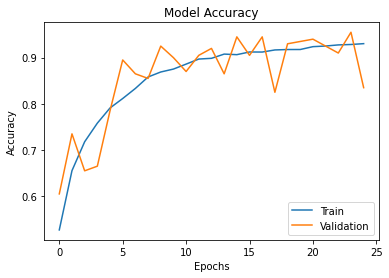

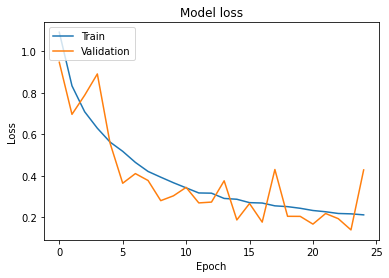

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 64)        2368      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                802880    
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
Total params: 805,508
Trainable params: 805,508
Non-trainable params: 0
________________________________________________

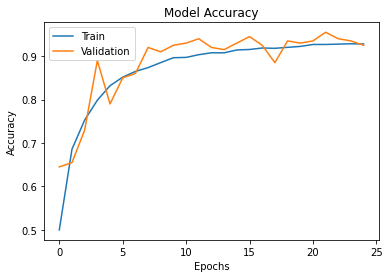

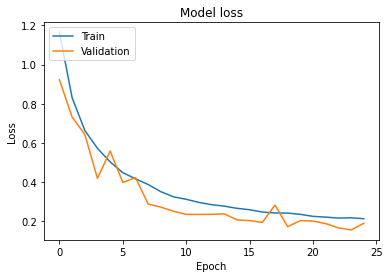

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 28, 28, 64)        2368      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                200768    
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 4)                 260       
Total params: 203,396
Trainable params: 203,396
Non-trainable params: 0
________________________________________________

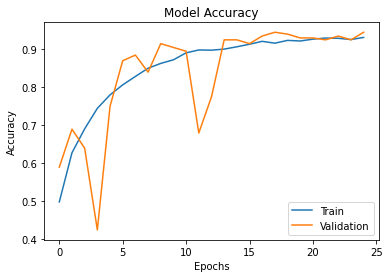

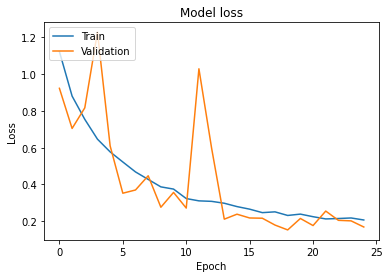

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        6464      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                802880    
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 260       
Total params: 809,604
Trainable params: 809,604
Non-trainable params: 0
________________________________________________

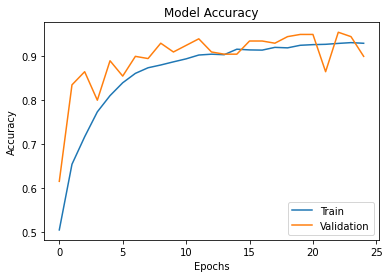

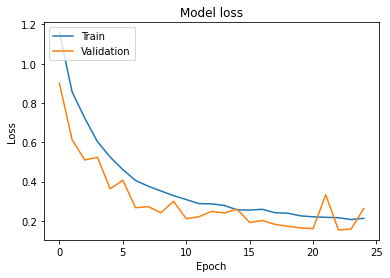

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 64)        6464      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                200768    
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 260       
Total params: 207,492
Trainable params: 207,492
Non-trainable params: 0
________________________________________________

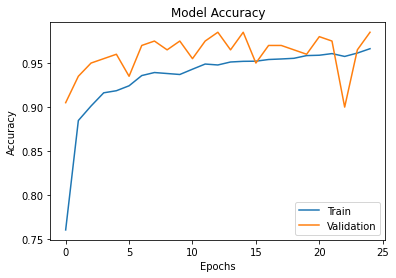

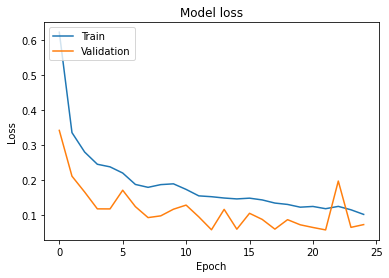

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 64)        2368      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_9 (Dense)              (None, 64)                802880    
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 260       
Total params: 805,508
Trainable params: 805,508
Non-trainable params: 0
________________________________________________

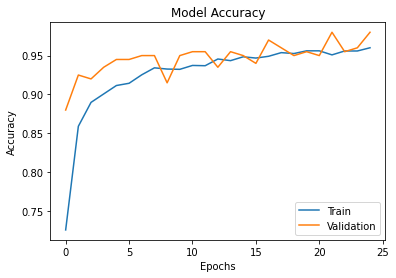

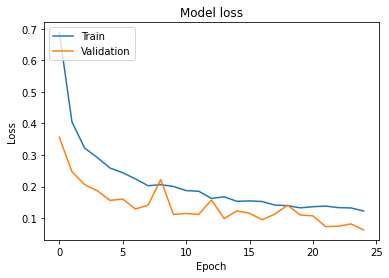

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        2368      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                200768    
_________________________________________________________________
dropout_6 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_12 (Dense)             (None, 4)                 260       
Total params: 203,396
Trainable params: 203,396
Non-trainable params: 0
________________________________________________

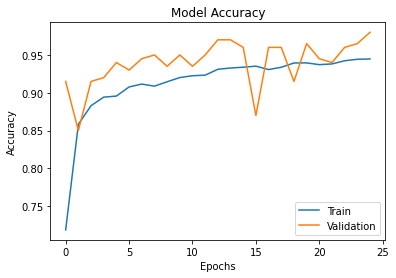

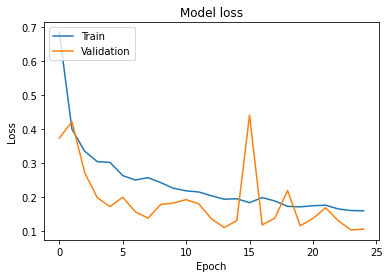

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 28, 28, 64)        6464      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 12544)             0         
_________________________________________________________________
dense_13 (Dense)             (None, 64)                802880    
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 4)                 260       
Total params: 809,604
Trainable params: 809,604
Non-trainable params: 0
________________________________________________

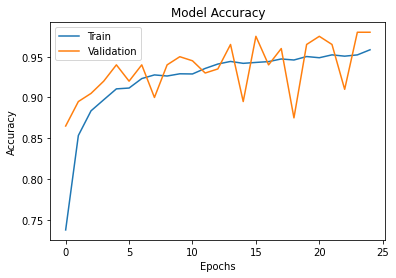

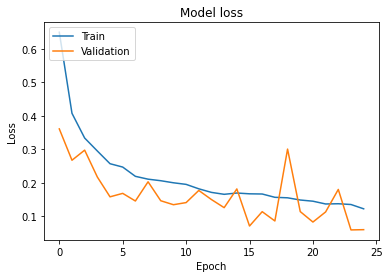

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 64)        6464      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_8 (Flatten)          (None, 3136)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 64)                200768    
_________________________________________________________________
dropout_8 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_16 (Dense)             (None, 4)                 260       
Total params: 207,492
Trainable params: 207,492
Non-trainable params: 0
________________________________________________

In [8]:
for opt in ['SGD', 'adam']:
  for ker in [3,5]:
    for pool in [2,4]:
      print("\n \n ", opt, ' ', ker, ' ', pool, ' \n')
      model=Sequential() #Chạy các lớp tuần tự
      model.add(Conv2D(64, kernel_size=ker,strides=(1,1), activation='relu',padding="same", input_shape=(28,28,4))) #l
      model.add(MaxPooling2D(pool_size=(pool,pool))) #Lớp gộp giảm chiều dữ liệu
      model.add(Flatten())
      model.add(Dense(64,activation='relu'))
      model.add(Dropout(0.5)) #loại bỏ kết quả nhỏ hơn 0.5
      model.add(Dense(4,activation='softmax'))

        #Compile
      model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

        #Fit model
      history= model.fit(X_train,Y_train,batch_size=64, epochs=25, verbose=1, validation_data=(X_val, Y_val))           
      
        
      #Save model
      model.save('/content/drive/My Drive/Model_'+str(opt)+'_Filter' + str(ker)+'_pool'+ str(pool)+'.h5')

      plt.plot(history.history['accuracy'])
      plt.plot(history.history['val_accuracy'])
      plt.title('Model Accuracy')
      plt.xlabel('Epochs')
      plt.ylabel('Accuracy')
      plt.legend(['Train','Validation'], loc='best')
      plt.savefig('/content/drive/My Drive/Acc_' + str(opt)+'_Filter' + str(ker)+'_pool'+ str(pool)+'.png')
      plt.show()

      plt.plot(history.history['loss'])
      plt.plot(history.history['val_loss'])
      plt.title('Model loss')
      plt.ylabel('Loss')
      plt.xlabel('Epoch')
      plt.legend(['Train', 'Validation'], loc='upper left')
      plt.savefig('/content/drive/My Drive/Loss_' + str(opt)+'_Filter' + str(ker)+'_pool'+ str(pool)+'.png')
      plt.show()
        #Summary model
      model.summary()
      pred_train=[]
      pred_test=[]
      pred_train=model.predict(X_train, verbose=1)
      pred_test=model.predict(X_test, verbose=1)
      pred_test_official=np.copy(pred_test)

        #nhãn số:
      y_train=np.copy(Y_train)
      y_test=np.copy(Y_test)
      #Chuyển nhãn số confusion matrix
      y_train_labels=convert(y_train)
      y_test_labels=convert(y_test)

        #pred số nguyên
        #Train
      for i in range(0,len(pred_train)):
        for j in range(0, len(pred_train[i])):
            if pred_train[i][j] == np.amax(pred_train[i]):
                pred_train[i][j]=1
            else:
                pred_train[i][j]=0
      pred_train=pred_train.astype(int)
      #
      # #Test
      for i in range(0,len(pred_test)):
        for j in range(0, len(pred_test[i])):
          if pred_test[i][j] == np.amax(pred_test[i]):
              pred_test[i][j]=1
          else:
              pred_test[i][j]=0
      pred_test=pred_test.astype(int)

        #Confusion Matrix
      y_train_pred_labels=convert(pred_train)
      y_test_pred_labels=convert(pred_test)
      cm_train=confusion_matrix(y_train_labels,y_train_pred_labels)
      cm_test=confusion_matrix(y_test_labels, y_test_pred_labels)
      print ('Confusion Train: \n ', cm_train,'\nConfusion Test \n', cm_test)

        #Accuracy
      loss_train, acc_train= model.evaluate(X_train,Y_train, batch_size=64)
      loss_test, acc_test= model.evaluate(X_test,Y_test, batch_size=64)
      print('acc Train: ',acc_train, '\nacc Test', acc_test)


      Kernel.append(ker)
      Pooling.append(pool)
      Optimizer.append(opt)
      Acc_train.append(acc_train)
      Acc_test.append(acc_test)

In [9]:
Last_result['Optimizer']=Optimizer
Last_result['Kernel']=Kernel
Last_result['Pooling']= Pooling
Last_result['Acc Train']=Acc_train
Last_result['Acc Test']=Acc_test
Last_result.to_csv('/content/drive/My Drive/Result.csv')